# What's In a Name?

In [1]:
%load_ext ipython_nose
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## 1. Introduction to Baby Names Data

> What’s in a name? That which we call a rose, By any other name would smell as sweet.

In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing. 

Let us start by reading the data.

In [3]:
import pandas as pd
bnames = pd.read_csv('datasets/names.csv.gz')
bnames.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [61]:
%%nose
def test_bnames_exists():
    """bnames is defined."""
    assert 'bnames' in globals(), "You should have defined a variable named bnames"
# bnames is a dataframe with 1891894 rows and 4 columns
def test_bnames_dataframe():
    """bnames is a DataFrame with 1891894 rows and 4 columns"""
    import pandas as pd
    assert isinstance(bnames, pd.DataFrame)
    assert bnames.shape[0] == 1891894, "Your  DataFrame, bnames, should contain 1891984 rows"
    assert bnames.shape[1] == 4, "Your DataFrame, bnames, should contain 4 columns"

# bnames has column names ['name', 'sex', 'births', 'year']
def test_bnames_colnames():
    """bnames has column names ['name', 'sex', 'births', 'year']"""
    colnames = ['name', 'sex', 'births', 'year']
    assert all(name in bnames for name in colnames), "Your DataFrame, bnames, should have columns named name, sex, births and year"

3/3 tests passed


Welcome to your project! While working through the tasks in this project, please make sure to read the narrative for each task in the notebook on the right, before reading the more detailed instructions here! 

In this task, you will read the data from the csv file `datasets/names.csv.gz` and save it as a `DataFrame` named `bnames`

- Import any additional libraries (e.g. `pandas`) that you might need. 
- Inspect the first few rows of the data to make sure you have the read the data correctly.

If you print the first few rows of data, you should see a table resembling the one shown below.


|name      |sex | births| year|
|:---------|:---|------:|----:|
|Mary      |F   |   7065| 1880|
|Anna      |F   |   2604| 1880|
|Emma      |F   |   2003| 1880|
|Elizabeth |F   |   1939| 1880|



In [35]:
# Import modules


# Read names into a dataframe: bnames



You might want to look up this [exercise](https://campus.datacamp.com/courses/pandas-foundations/data-ingestion-inspection?ex=10) on how to read a csv file.

```python
import ___ as ___
bnames = pd.read_csv(____)
```

## 2. Exploring Trends in Names

One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!

In [62]:
import numpy as np
bnames_2010 = bnames.loc[bnames['year'] > 2010]
bnames_2010_agg = bnames_2010.\
  groupby(['sex', 'name'], as_index=False)['births'].\
  sum()
bnames_top5 = bnames_2010_agg.\
  sort_values(['sex', 'births'], ascending=[True, False]).\
  groupby('sex').\
  head().\
  reset_index(drop=True)
bnames_top5

,sex,name,births
0,F,Emma,121375
1,F,Sophia,117352
2,F,Olivia,111691
3,F,Isabella,103947
4,F,Ava,94507
5,M,Noah,110280
6,M,Mason,105104
7,M,Jacob,104722
8,M,Liam,103250
9,M,William,99144


In [63]:
%%nose
def test_bnames_top5_exists():
    """bnames_top5 is defined."""
    assert 'bnames_top5' in globals(), \
      "You should have defined a variable named bnames_top5."

def test_bnames_top5_df():
    """Output is a DataFrame with 10 rows and 3 columns."""
    assert bnames_top5.shape == (10, 3), \
      "Your DataFrame, bnames_top5, should have 10 rows and 3 columns."

def test_bnames_top5_df_colnames():
    """Output has column names: name, sex, births."""
    assert all(name in bnames_top5 for name in ['name', 'sex', 'births']), \
      "Your DataFrame, bnames_top5 should have columns named name, sex, births."

def test_bnames_top5_df_contains_names():
    """Output has the follwing female names: Emma, Sophia, Olivia, Isabella, Ava"""
    target_names = ['Emma', 'Sophia', 'Olivia', 'Isabella', 'Ava']
    assert set(target_names).issubset(bnames_top5['name']), \
      "Your DataFrame, bnames_top5 should contain the female names: Emma, Sophia, Olivia, Isabella, Ava"

def test_bnames_top5_df_contains_female_names():
    """Output has the following male names: Noah, Mason, Jacob, Liam, William"""
    target_names = ['Noah', 'Mason', 'Jacob', 'Liam', 'William']
    assert set(target_names).issubset(bnames_top5['name']), \
      "Your DataFrame, bnames_top5 should contain the male names: Noah, Mason, Jacob, Liam, William"

5/5 tests passed


Create a new `DataFrame` called `bnames_top5` with the top five male and female names of this decade.

- It should consist of the columns `sex`, `name`, and `births`. 
- Make sure to `filter`, `group`, `aggregate`, and `sort` your data appropriately, such that the top five most common female names of the decade are displayed before the top five most common male names of the decade. 
- Inspect your newly created `DataFrame` to make sure your analysis looks right. 

If you print `bnames_top5`, you should see some rows that resemble the table shown below.

|sex |name   | births|
|:---|:------|------:|
|F   |E..    | 121...|
|F   |S..    | 117...|
|F	 |O..	 | 111...|

Note that some characters in the table have been redacted on purpose, so that we don't give away the solution.

In [64]:
# bnames_top5: A dataframe with top 5 popular male and female names for the decade



If you need a refresher on manipulating DataFrames, you might want to check out these exercises on [filtering data](https://campus.datacamp.com/courses/manipulating-DataFrames-with-pandas/extracting-and-transforming-data?ex=10), [grouping data](https://campus.datacamp.com/courses/manipulating-DataFrames-with-pandas/grouping-data?ex=3), and [sorting data](https://campus.datacamp.com/courses/merging-DataFrames-with-pandas/preparing-data?ex=6), respectively. 

Shown below is some code to help you complete the task!

```python
import numpy as np
bnames_2010 = bnames.loc[bnames[___] > ___]
bnames_2010_agg = bnames_2010.\
  groupby([___, ___], as_index=False)['births'].\
  sum()
bnames_top5 = bnames_2010_agg.\
  sort_values([___, ___], ascending=[True, False]).\
  groupby(___).\
  head().\
  reset_index(drop=True)
```

## 3. Proportion of Births

While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.

In [65]:
total_births_by_year = bnames.\
  groupby('year')['births'].\
  transform(np.sum)
bnames2 = bnames.copy()
bnames2['prop_births'] = bnames2['births']/total_births_by_year
bnames2.head()

,name,sex,births,year,prop_births
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666


In [66]:
%%nose
def test_bnames2_exists():
    """bnames2 is defined."""
    assert 'bnames2' in globals(),\
      "You should have defined a variable named bnames2."
    
def test_bnames2_dataframe():
    """bnames2 is a DataFrame with 1891894 rows and 5 columns"""
    import pandas as pd
    assert isinstance(bnames2, pd.DataFrame)
    assert bnames2.shape[1] == 5,\
      "Your DataFrame, bnames2, should have 5 columns"
    assert bnames2.shape[0] == 1891894,\
      "Your DataFrame, bnames2,  should have 1891894 rows"


def test_bnames2_colnames():
    """bnames2 has column names ['name', 'sex', 'births', 'year', 'prop_births']"""
    colnames = ['name', 'sex', 'births', 'year', 'prop_births']
    assert all(name in bnames2 for name in colnames),\
      "Your DataFrame, bnames2, should have column names 'name', 'sex', 'births', 'year', 'prop_births'"

3/3 tests passed


Add a new column containing the proportion of births by year.

- Compute the proportion of births by dividing `births` by the total number of `births` in a `year`. 
- Add it as a new column to the data frame `bnames2`, that is a copy of the original `bnames` data.
- Inspect the rows of `bnames2` to ensure that you have it right. If you print a few rows of `bnames2`, you should see a table resembling the one shown below.

| name | sex |	births |	year |	prop_births
|:-----|:----|:--------|:--------|:------------
|Mary |	F |	7065 |	1880 | 0.035065
|Anna |	F |	2604 |	1880 | 0.012924
|Emma |	F |	2003 |	1880 | 0.009941
|... |	... |	... |	... | ...

Note that some characters in the table have been redacted on purpose, so that we don't give away the solution.

In [67]:
bnames2 = bnames.copy()
# Compute the proportion of births by year and add it as a new column
# -- YOUR CODE HERE --

If you are stuck, this [exercise](https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/grouping-data?ex=10) on grouping and transforming data may be a useful reference.

```python
bnames2 = bnames.copy()
total_births_by_year = bnames.\
  groupby(___)[___].\
  transform(___)
bnames2['prop_births'] = ___
```

## 4. Popularity of Names

Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names `Elizabeth`, and `Deneen`, and inspecting the underlying trends for any interesting patterns!

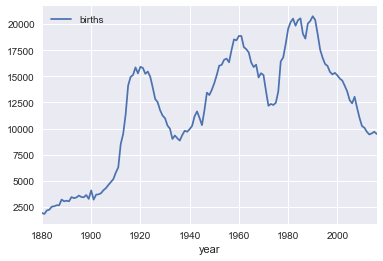

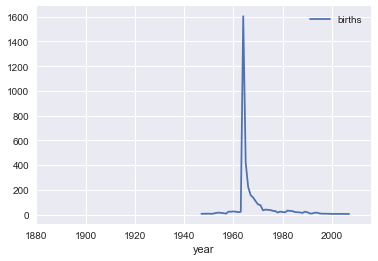

In [68]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Function to plot trends by name and sex
def plot_trends(name, sex):
  data = bnames[(bnames.name == name) & (bnames.sex == sex)]
  ax = data.plot(x = "year", y = "births")
  ax.set_xlim(1880, 2016)
  return ax

# Plot trends for Elizabeth and Deneen
for name in ["Elizabeth", "Deneen"]:
    plot_trends(name, "F")
    
# How many times did these female names peak?
num_peaks_elizabeth = 3
num_peaks_deneen = 1

In [69]:
%%nose
def test_peaks_elizabeth():
    """The name Elizabeth peaks 3 times."""
    assert num_peaks_elizabeth == 3, \
      "The name Elizabeth peaks 3 times"
    
def test_peaks_deneen():
    """The name Deneen peaks 1 time."""
    assert num_peaks_deneen == 1, \
      "The name Deneen peaks only once"

2/2 tests passed


It is best to write a function to plot the trends, so that we can keep our code [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself).

- Write a function named `plot_trends` that takes two arguments, `name` and `sex`, and plots the trend in number of `births` by year.
- Use the function to plot the popularity of the female names `Elizabeth` and `Deneen`.
- Inspect the plots for peaks and fill out the values of `num_peaks_elizabeth` and `num_peaks_deneen`.

Shown below is a snippet of the plot produced for a randomly selected name. This is provided here only to give you an idea of what is expected from the plotting function. Please make sure to label your axes and add an informative title.


![img](https://s3.amazonaws.com/assets.datacamp.com/projects/babynames/X8oXg4D.png)


In [27]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trends(name, sex):
  # -- YOUR CODE HERE --
  return


# Plot trends for Elizabeth and Deneen 
# -- YOUR CODE HERE --
    
# How many times did these female names peak?
num_peaks_elizabeth = ...
num_peaks_deneen    = ...

Shown below is some code that should help you write the plotting function and complete this task!

```python
def plot_trends(name, sex):
  data = bnames[(bnames.name == ___) & (___)]
  ax = data.plot(x = "___", y = "___")
  ax.set_xlim(1880, 2016)
  return ax

# Plot trends for Elizabeth and Deneen
for name in ___:
  ___
```

## 5. Trendy vs. Stable Names

Based on the plots we created earlier, we can see that __Elizabeth__ is a fairly stable name, while __Deneen__ is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down. 

There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name `Joe` had the proportions `0.1, 0.2, 0.1, 0.1`, then the trendiness measure would be `0.2/(0.1 + 0.2 + 0.1 + 0.1)` which equals `0.5`.

Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.

In [70]:
names = pd.DataFrame()
name_and_sex_grouped = bnames.groupby(['name', 'sex'])
names['total'] = name_and_sex_grouped['births'].sum()
names['max'] = name_and_sex_grouped['births'].max()
names['trendiness'] = names['max']/names['total']

top10_trendy_names = names.\
  loc[names['total'] > 1000].\
  sort_values('trendiness', ascending=False).\
  head(10).\
  reset_index()

top10_trendy_names

,name,sex,total,max,trendiness
0,Christop,M,1082,1082,1.000000
1,Royalty,F,1057,581,0.549669
2,Kizzy,F,2325,1116,0.480000
3,Aitana,F,1203,564,0.468828
4,Deneen,F,3602,1604,0.445308
5,Moesha,F,1067,426,0.399250
6,Marely,F,2527,1004,0.397309
7,Kanye,M,1304,507,0.388804
8,Tennille,F,2172,769,0.354052
9,Kadijah,F,1411,486,0.344437


In [28]:
%%nose
def test_top10_trendy_names_exists():
    """top10_trendy_names is defined"""
    assert 'top10_trendy_names' in globals(), \
      "You should have defined a variable namedtop10_trendy_names."
def test_top10_trendy_df():
    """top10_trendy_names is a dataframe with 10 rows and 5 columns."""
    assert top10_trendy_names.shape == (10, 5), \
      "Your data frame, top10_trendy_names, should have 10 rows and 5 columns."

def test_top10_trendy_df_colnames():
    """top10_trendy_names has column names: name, sex, births, max and trendiness"""
    assert all(name in top10_trendy_names for name in ['name', 'sex', 'total', 'max', 'trendiness']), \
       "Your data frame, top10_trendy_names, should have column names: name, sex, births, max and trendiness"

def test_top10_trendy_df_contains_female_names():
    """top10_trendy_names has the follwing female names: Royalty, Kizzy, Aitana, Deneen, Moesha, Marely, Tennille, Kadijah"""
    target_names = ['Royalty', 'Kizzy', 'Aitana', 'Deneen', 'Moesha', 'Marely', 'Tennille', 'Kadijah']
    assert set(target_names).issubset(top10_trendy_names['name']), \
      "Your data frame, top10_trendy_names, should have female names: Royalty, Kizzy, Aitana, Deneen, Moesha, Marely, Tennille, Kadijah."

def test_top10_trendy_df_contains_male_names():
    """top10_trendy_names has the following male names: Christop, Kanye"""
    target_names = ['Christop', 'Kanye']
    assert set(target_names).issubset(top10_trendy_names['name']), \
      "Your data frame, top10_trendy_names, should have male names: Christop, Kanye"

5/5 tests passed


Create a new `DataFrame` named `top10_trendy_names` that consists of the top 10 trendy names in the dataset with at least a 1000 births. 

- The new data frame should include three new columns: `total`, `max` and `trendiness` for every `name` and `sex`. 
- The `total` column should represent total number of births across all years.
- The `max` column should represent the maximum number of births in a year, across all years. 
- The `trendiness` column is computed as the `max` divided by the `total`. 
- Make sure to include only those names that have at least a 1000 births!

If you print the first few rows of your data frame, you should see a table resembling this:

| name	| sex |	total	| max	| trendiness
|:------|:----|:--------|:------|:-----------
|C...	|M	  |...	    |...	|1.000000
|R...	|F	  |...	    |581	|...
|K...	|F	  |2325	    |...	|...

Note that some characters in the table have been redacted on purpose, so that we don't give away the solution.

In [30]:
# top10_trendy_names | A Data Frame of the top 10 most trendy names




These exercises on [filtering data](https://campus.datacamp.com/courses/manipulating-DataFrames-with-pandas/extracting-and-transforming-data?ex=10), [grouping data](https://campus.datacamp.com/courses/manipulating-DataFrames-with-pandas/grouping-data?ex=3), and [sorting data](https://campus.datacamp.com/courses/merging-DataFrames-with-pandas/preparing-data?ex=6) may serve as useful references.

```python
names = pd.DataFrame()
name_and_sex_grouped = bnames.___([___, ___])
names['total'] = name_and_sex_grouped[___].sum()
names['max'] = ___
names['trendiness'] = ___

top10_trendy_names = names.\
  loc[names[___] > ___].\
  ___(___, ascending=False).\
  head(10).\
  reset_index()
```

## 6. Bring in Mortality Data

So, what more is in a name? Well, with some further work, it is possible to predict the age of a person based on the name (Whoa! Really????). For this, we will need actuarial data that can tell us the chances that someone is still alive, based on when they were born. Fortunately, the [SSA](https://www.ssa.gov/) provides detailed [actuarial life tables](https://www.ssa.gov/oact/STATS/table4c6.html) by birth cohorts.


| year| age|      qx|    lx|  dx|    Lx|      Tx|    ex|sex |
|----:|---:|-------:|-----:|---:|-----:|-------:|-----:|:---|
| 1910|  39| 0.00283| 78275| 222| 78164| 3129636| 39.98|F   |
| 1910|  40| 0.00297| 78053| 232| 77937| 3051472| 39.09|F   |
| 1910|  41| 0.00318| 77821| 248| 77697| 2973535| 38.21|F   |
| 1910|  42| 0.00332| 77573| 257| 77444| 2895838| 37.33|F   |
| 1910|  43| 0.00346| 77316| 268| 77182| 2818394| 36.45|F   |
| 1910|  44| 0.00351| 77048| 270| 76913| 2741212| 35.58|F   |


You can read the [documentation for the lifetables](https://www.ssa.gov/oact/NOTES/as120/LifeTables_Body.html) to understand what the different columns mean. The key column of interest to us is `lx`, which provides the number of people born in a `year` who live upto a given `age`. The probability of being alive can be derived as `lx` by 100,000. 

Given that 2016 is the latest year in the baby names dataset, we are interested only in a subset of this data, that will help us answer the question, "What percentage of people born in Year X are still alive in 2016?" 

Let us use this data and plot it to get a sense of the mortality distribution!

,year,age,qx,lx,dx,Lx,Tx,ex,sex
116,1900,116,0.83363,0.0,0,0,0,0.69,M
236,1900,116,0.83363,0.0,0,0,0,0.69,F
346,1910,106,0.51178,7.0,3,5,9,1.38,M
466,1910,106,0.47062,61.0,29,47,92,1.52,F
576,1920,96,0.30765,1625.0,500,"1,375","4,000",2.46,M


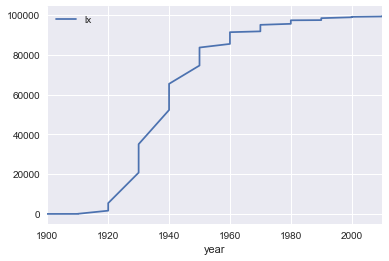

In [83]:
# Read lifetables from datasets/lifetables.csv
lifetables = pd.read_csv('datasets/lifetables.csv')

# Extract subset relevant to those alive in 2016
lifetables_2016 = lifetables[lifetables['year'] + lifetables['age'] == 2016]

# Plot the mortality distribution: year vs. lx
lifetables_2016.plot(x = 'year', y = 'lx')

# Inspect lifetables_2016
lifetables_2016.head()

In [85]:
%%nose
def test_lifetables_2016_exists():
    """lifetables_2016 is defined"""
    assert 'lifetables_2016' in globals(), \
      "You should have defined a variable named lifetables_2016."
def test_lifetables_2016_df():
    """Output is a DataFrame with 24 rows and 9 columns."""
    assert lifetables_2016.shape == (24, 9), \
      "Your DataFrame, lifetables_2016, should have 24 rows and 9 columns."

def test_lifetables_2016_df_colnames():
    """Output has column names: year, age, qx, lx, dx, Lx, Tx, ex, sex"""
    assert all(name in lifetables_2016 for name in ['year', 'age', 'qx', 'lx', 'dx', 'Lx', 'Tx', 'ex', 'sex']), \
      "Your DataFrame, lifetables_2016, should have columns named: year, age, qx, lx, dx, Lx, Tx, ex, sex."

def test_lifetables_2016_df_year_plus_age():
    """Output has the year + age = 2016"""
    assert all(lifetables_2016.year + lifetables_2016.age - 2016 == 0), \
      "The `year` column and `age` column in `lifetables_2016` should sum up to 2016."

4/4 tests passed


We have already scraped the actuarial tables and made them available as `datasets/lifetables.csv`. In this task, you will:

- Create a data frame named `lifetables` by reading `lifetables.csv`. 
- Extract a subset of this data frame named `lifetables_2016`, that contains rows where `year` and `age` add up to 2016, as these are the rows relevant to answer the question of interest. 
- Plot `lx` vs `year` to get a sense of the mortality distribution in `lifetables_2016`.

If you print a few rows of the data frame, you should see a table resembling the one shown below.

| year	| age	| qx	| lx	| dx	| Lx	| Tx	| ex	|sex
|:------|:------|:------|:------|:------|:------|:------|:------|:----
|1900	|116	|0.83363|	0.0	|0	    |0	    |0	    | 0.69	| M
|1900	|116	|0.83363|	0.0	|0	    |0	    |0	    | 0.69	| F

In [86]:
# Read lifetables from datasets/lifetables.csv


# Extract subset relevant to those alive in 2016


# Plot the mortality distribution: year vs. lx



Shown below is some code that should help you complete this task!

```python
# Read lifetables from datasets/lifetables.csv
lifetables = pd.___(___)

# Extract subset relevant to those alive in 2016
lifetables_2016 = lifetables[lifetables[___] + ___ == ___]

# Plot the mortality distribution: year vs. lx
lifetables_2016.___(x = ___, y = ___)
```

## 7. Smoothen the Curve!

We are almost there. There is just one small glitch. The cohort life tables are provided only for every decade. In order to figure out the distribution of people alive, we need the probabilities for every year. One way to fill up the gaps in the data is to use some kind of interpolation. Let us keep things simple and use linear interpolation to fill out the gaps in values of `lx`, between the years `1900` and `2016`.

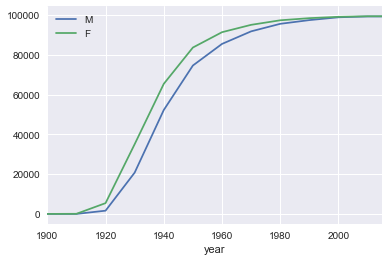

In [87]:
year = np.arange(1900, 2016)
mf = {"M": pd.DataFrame(), "F": pd.DataFrame()}
for sex in ["M", "F"]:
  d = lifetables_2016[lifetables_2016.sex == sex][["year", "lx"]]
  mf[sex] =  mf[sex] = d.set_index('year').\
    reindex(year).\
    interpolate().\
    reset_index()
  mf[sex]['sex'] = sex

lifetable_2016_s = pd.concat(mf, ignore_index = True)

fig, ax = plt.subplots()
for sex in ['M', 'F']:
  lifetable_2016_s[lifetable_2016_s.sex == sex].plot(x = 'year', y = 'lx', ax = ax, label = sex)

In [72]:
%%nose
def test_lifetable_2016_s_exists():
    """lifetable_2016_s is defined"""
    assert 'lifetable_2016_s' in globals(), \
      "You should have defined a variable named lifetable_2016_s."
def test_lifetables_2016_s_df():
    """lifetable_2016_s is a dataframe with 232 rows and 3 columns."""
    assert lifetable_2016_s.shape == (232, 3), \
      "Your DataFrame, lifetable_2016_s, should have 232 rows and 3 columns."

def test_lifetable_2016_s_df_colnames():
    """lifetable_2016_s has column names: year, lx, sex"""
    assert all(name in lifetable_2016_s for name in ['year', 'lx', 'sex']), \
      "Your DataFrame, lifetable_2016_s, should have columns named: year, lx, sex."

3/3 tests passed


- Create a new data frame `lifetable_2016_s` from `lifetables` that consists of years from 1900 to 2010.
- Linearly interpolate values of `lx`, where they are missing. You might want to use the `.interpolate` function from `pandas`. 

If you print the first few rows of `lifetable_2016_s`, you should see a table that resembles

|lx	  |sex	|year
|:----|:----|:-----
|0.0  |F	|1900
|6.1  |F	|1901
|12.2 |F	|1902


In [44]:
# Create smoothened lifetable_2016_s by interpolating values of lx



Shown below is some code that should help you complete this task!

```python
year = np.arange(1900, 2016)
mf = {"M": pd.DataFrame(), "F": pd.DataFrame()}
for sex in ["M", "F"]:
  d = lifetables_2016[___ == ___][["year", "lx"]]
  mf[sex] = d.set_index('year').\
    reindex(year).\
    interpolate().\
    reset_index()
  mf[sex]['sex'] = sex

lifetable_2016_s = pd.concat(mf, ignore_index = True)
```

## 8. Distribution of People Alive by Name

Now that we have all the required data, we need a few helper functions to help us with our analysis. 

The first function we will write is `get_data`,which takes `name` and `sex` as inputs and returns a data frame with the distribution of number of births and number of people alive by year.

The second function is `plot_name` which accepts the same arguments as `get_data`, but returns a line plot of the distribution of number of births, overlaid by an area plot of the number alive by year.

Using these functions, we will plot the distribution of births for boys named __Joseph__ and girls named __Brittany__.

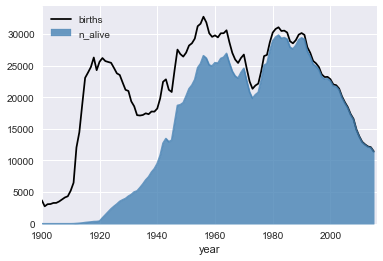

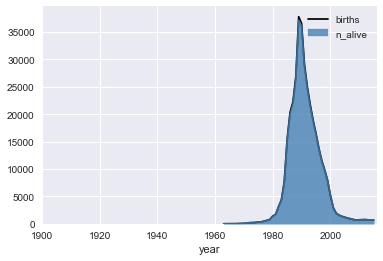

In [56]:
def get_data(name, sex):
  name_sex = ((bnames['name'] == name) & 
              (bnames['sex'] == sex))
  data = bnames[name_sex].merge(lifetable_2016_s)
  data['n_alive'] = data['lx']/(10**5)*data['births']
  return data

def plot_data(name, sex):
    fig, ax = plt.subplots()
    dat = get_data(name, sex)
    dat.plot(x = 'year', y = 'births', ax = ax, 
              color = 'black')
    dat.plot(x = 'year', y = 'n_alive', 
              kind = 'area', ax = ax, 
              color = 'steelblue', alpha = 0.8)
    ax.set_xlim(1900, 2016)

plot_data('Joseph', 'M')
plot_data('Brittany', 'F')

In [53]:
%%nose
joseph = get_data('Joseph', 'M')
def test_joseph_df():
    """get_data('Joseph', 'M') is a dataframe with 116 rows and 6 columns."""
    assert joseph.shape == (116, 6), \
      "Running  get_data('Joseph', 'M') should return a data frame with 116 rows and 6 columns."

def test_joseph_df_colnames():
    """get_data('Joseph', 'M') has column names: name, sex, births, year, lx, n_alive"""
    assert all(name in lifetable_2016_s for name in ['year', 'lx', 'sex']), \
      "Running  get_data('Joseph', 'M') should return a data frame with column names: name, sex, births, year, lx, n_alive"

2/2 tests passed


In this task, you will write two functions: `get_data`, and `plot_name`.

`get_data`

- The `get_data` function should takes `name` and `sex` as inputs and returns a `DataFrame`.
- It should consist of the number of births (`births`) and number of people alive (`n_alive`) by year, for each name. - - One way to accomplish this is to merge the `lifetable_2016_s` data with `bnames`, and computing the number of people alive by multiplying `lx` and `births` and dividing the result by 100,000.
- If you run `get_data("Joseph", "M")`, you should get a `DataFrame`, with the following columns. Your values for `lx` and `n_alive` might vary from the values shown above, depending on how you interpolated your lifetables. That is fine and will not lead to any issues during testing.

|name	|sex  |births |	year  |lx	| n_alive
|:------|:----|:------|:------|:----|:-------
|Joseph	|M	  |3714	  | 1900  |0.0	|0.000000
|Joseph	|M	  |2766	  | 1901  |0.7	|0.019362
|Joseph	|M	  |3098	  | 1902  |1.4	|0.043372


`plot_name`


- The `plot_name` function should plot the data frame to display the distribution of births and number living. 
- You might want to look at using the `plot` methods in `pandas` to do this. 
- The plot for girls named __Brittany__ should look somewhat like the plot shown below. Your actual plot might look a little different based on how you interpolated the data.

![brittany](https://s3.amazonaws.com/assets.datacamp.com/projects/babynames/KHvL4Pr.png)

In [39]:
def get_data(name, sex):
    # YOUR CODE HERE
    return
    

def plot_data(name, sex):
    # YOUR CODE HERE
    return 
    
# Plot the distribution of births and number alive for Joseph and Brittany


Shown below is some code to help you complete this task!

```python
def get_data(name, sex):
    name_sex = ((bnames[___] == ___) & 
                (bnames[___] == ___))
  data = bnames[name_sex].merge(___)
    data['n_alive'] = data['___']/(10**5)*data['births']
    return data

def plot_data(name, sex):
    fig, ax = plt.subplots()
    dat = get_data(name, sex)
    dat.plot(x = '___', y = '___', ax = ax, 
               color = 'black')
    dat.___(x = '___', y = '___', 
              kind = '____', ax = ax, 
              color = 'steelblue', alpha = 0.8)
    ax.set_xlim(1900, 2016)
```

## 9. Estimate Age

In this section, we want to figure out the probability that a person with a certain name is alive, as well as the quantiles of their age distribution. In particular, we will estimate the age of a female named __Gertrude__. Any guesses on how old a person with this name is? How about a male named __William__?

In [76]:
from wquantiles import quantile
def estimate_age(name, sex):
  data = get_data(name, sex)
  qs = [0.75, 0.5, 0.25]
  quantiles = [2016 - int(quantile(data.year, data.n_alive, q)) for q in qs]
  result = dict(zip(['q25', 'q50', 'q75'], quantiles))
  result['p_alive'] = round(data.n_alive.sum()/data.births.sum(), 3)
  result['sex'] = sex
  result['name'] = name
  return pd.Series(result)
  
estimate_age('Gertrude', 'F')

name       Gertrude
p_alive       0.187
q25              70
q50              80
q75              89
sex               F
dtype: object

In [74]:
%%nose
gertrude = estimate_age('Gertrude', 'F')
def test_gertrude_names():
    """Series has indices name, p_alive, q25, q50 and q75"""
    expected_names = ['name', 'p_alive', 'q25', 'q50', 'q75']
    assert all(name in gertrude.index.values for name in expected_names), \
      "Your function `estimate_age` should return a series with names: name, p_alive, q25, q50 and q75"

def test_gertrude_q50():
    """50th Percentile of age for Gertrude is between 75 and 85"""
    assert ((75 < gertrude['q50']) and (gertrude['q50'] < 85)), \
      "The estimated median age for the name Gertrude should be between 75 and 85."

2/2 tests passed


In this task, you will:

- Write a function named `estimate_age` that accepts two arguments `name` and `sex`. 
- It should returns a `pd.Series` object with the indices the indices `name`, `p_alive` (probability of being alive), `q25`, `q50` and `q75` (age quantiles). 
- As we are dealing with weighted data, you might want to use the `quantile` function from the `wquantiles` module to compute the quantiles. Note that the `quantile` function, accepts a data array and a weights array.
- Use this function to estimate the age  of __Gertrude__.

If you call the function `estimate_age` with a specific `name` and `sex`, your output should resemble something like this:

```
name            ...
p_alive       0.423
q25              30
q50              60
q75              90
sex               F
dtype: object
```

In [60]:
# Import modules
from wquantiles import quantile

# Function to estimate age quantiles
def estimate_age(name, sex):
    # YOUR CODE HERE
    return

# Estimate the age of Gertrude


Shown below is some code to help you complete this task!

```python
from wquantiles import quantile
def estimate_age(name, sex):
  data = get_data(name, sex)
  qs = [0.75, 0.5, 0.25]
  quantiles = [2016 - int(quantile(data.year, data.n_alive, q)) for q in qs]
  result = dict(zip(['q25', 'q50', 'q75'], quantiles))
  result['p_alive'] = round(data.n_alive.sum()/data.births.sum()*100, 2)
  result['sex'] = sex
  result['name'] = name
  return pd.Series(result)
``` 

## 10. Median Age of Top 10 Female Names

In the previous section, we estimated the age of a female named Gertrude. Let's go one step further this time, and compute the 25th, 50th and 75th percentiles of age, and the probability of being alive for the top 10 most common female names of all time. This should give us some interesting insights on how these names stack up in terms of median ages!

In [89]:
top_10_female_names = bnames.\
  groupby(['name', 'sex'], as_index = False).\
  agg({'births': np.sum}).\
  sort_values('births', ascending = False).\
  query('sex == "F"').\
  head(10).\
  reset_index(drop = True)
estimates = pd.concat([estimate_age(name, 'F') for name in top_10_female_names.name], axis = 1)
median_ages = estimates.T.sort_values('q50').reset_index(drop = True)
median_ages

,name,p_alive,q25,q50,q75,sex
0,Sarah,0.861,20,30,38,F
1,Elizabeth,0.745,23,38,58,F
2,Jennifer,0.964,31,38,44,F
3,Susan,0.858,52,59,65,F
4,Patricia,0.768,54,63,71,F
5,Mary,0.544,53,64,74,F
6,Linda,0.834,57,64,69,F
7,Margaret,0.495,51,64,75,F
8,Barbara,0.706,58,66,74,F
9,Dorothy,0.358,64,75,85,F


In [90]:
%%nose
def test_median_ages_exists():
    """median_ages is defined"""
    assert 'median_ages' in globals(), \
      "You should have a variable named median_ages defined."
def test_median_ages_df():
    """median_ages is a dataframe with 10 rows and 6 columns."""
    assert median_ages.shape == (10, 6), \
      "Your DataFrame, median_ages, should have 10 rows and 6 columns"

def test_median_ages_df_colnames():
    """median_ages has column names: name, p_alive, q25, q50, q75 and sex"""
    assert all(name in median_ages for name in ['name', 'p_alive', 'q25', 'q50', 'q75', 'sex']), \
      "Your DataFrame, median_ages, should have columns named: name, p_alive, q25, q50, q75 and sex"

3/3 tests passed


- Extract the top 10 female names of all time from the `bnames` dataset. 
- Use the `estimate_age` function on each of the 10 names to create a `DataFrame` named `median_ages` 
- `median_ages` should contain the columns: `name`, `p_alive`, `q25`, `q50`, `q75` and `sex`. 
- Make sure to sort the resulting data frame by the median age `q50`.

In [91]:
# Create median_ages: DataFrame with Top 10 Female names, 
#    age percentiles and probability of being alive
# -- YOUR CODE HERE --






Shown below is some code to help you complete this task!

```python
top_10_female_names = bnames.\
  groupby([___, ___], as_index = False).\
  agg({'births': np.sum}).\
  sort_values(___, ascending = False).\
  query('sex == "F"').\
  head(___).\
  reset_index(drop = True)
estimates = pd.concat([___(name, 'F') for name in top_10_female_names.name], axis = 1)
median_ages = estimates.T.sort_values(___).reset_index(drop = True)
```